# Aufgabe 2
Verwendet in diesem Teil des Übungsblatts das Datenset um die Zylinderzahl der Fahrzeuge zu schätzen.
Behandelt die Variable num-of-cylinders dazu als kategoriales Merkmal. Ihr könnt dabei auf die
Vorverarbeitungsschritte aus dem ersten Teil (soweit möglich) aufbauen. Entwickelt auch hier (mindestens)
zwei Modelle auf Basis unterschiedlicher sklearn Klassifizierungsalgorithmen. Achtet auch hier auf eine
saubere Trennung von Trainings- und Testdaten und interpretiert eure Ergebnisse/Scores.

#### Wort zum Sonntag
Ich habe deine Anmerkung "Soviel wie möglich aus den bisherigen Notebooks wiederverwenden" sehr genau genommen.

## Bibliotheken

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.gaussian_process import GaussianProcessClassifier 
#from sklearn.gaussian_process.kernels import RBF 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import SGDClassifier 
#from sklearn.linear_model import Perceptron 
#import tensorflow as tf
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

# Data-Loading
Die Daten wurden als gesamtes in dem Data-Preparation Notebook vorverarbeitet. Diese Vorverarbeiteten Daten werden nun hier geladen und entsprechend nach der jweiligen Output-Variable gesplitet.

In [2]:
df = pd.read_csv('../data/clf_df_prepared.csv',delimiter=',',encoding='utf-8', index_col=[0])
#df.info() # => Ausschließlich float64 // symboling = insurance risk = position 0
'''df[['symboling']]=df[['symboling']].astype('float64')
df[['normalizedLosses']]=df[['normalizedLosses']].astype('float64')
df[['peakRpm']]=df[['peakRpm']].astype('float64')
df[['bore']]=df[['bore']].astype('float64')
df[['stroke']]=df[['stroke']].astype('float64')
df[['engineSize']]=df[['engineSize']].astype('float64')
df[['cityMpg']]=df[['cityMpg']].astype('float64')
df[['highwayMpg']]=df[['highwayMpg']].astype('float64')
df[['curbWeight']]=df[['curbWeight']].astype('float64')'''

"df[['symboling']]=df[['symboling']].astype('float64')\ndf[['normalizedLosses']]=df[['normalizedLosses']].astype('float64')\ndf[['peakRpm']]=df[['peakRpm']].astype('float64')\ndf[['bore']]=df[['bore']].astype('float64')\ndf[['stroke']]=df[['stroke']].astype('float64')\ndf[['engineSize']]=df[['engineSize']].astype('float64')\ndf[['cityMpg']]=df[['cityMpg']].astype('float64')\ndf[['highwayMpg']]=df[['highwayMpg']].astype('float64')\ndf[['curbWeight']]=df[['curbWeight']].astype('float64')"

## EDA & Preprocessing
Diese Schritte sind in die beiden bisher behandelten Notebooks ausgelagert. Das einzige, was in diesem Notebook gemacht wird ist die Skalierung der Daten. Das hat den Grund dass die skalierten Daten auch wieder rescaled werden müssen. Um hier dann keine Verwirrung zu stiften wird somit ausschließlich hier gescalet.

## Horizontaler & vertikaler Cut

In [3]:
input_features = list(df.columns)
in_features = list(range(1, len(input_features)))
out_feature = [0]

In [4]:
input_df = df.iloc[:,in_features]
output_df = df.iloc[:,out_feature]
inputTitles = (list(input_df.columns)) # für alle Fälle
outputTitles = (list(output_df.columns)) # für alle Fälle

In [5]:
train_X, test_X, train_y, test_y = train_test_split(
    input_df, 
    output_df,
    test_size=0.2,
    random_state = 123142
) 
len(test_X), len(test_y), len(train_X), len(train_y)

# brauchts für die CM
#test_y_numpy = test_y.to_numpy()
#test_y_numpy = test_y_numpy.ravel()

(41, 41, 164, 164)

## Skalieren

In der EDA habe ich zwar nicht wirklich Ausreißer detektiert, wähle jedoch aus meiner bisherigen Erfahrung den Robust-Scaler.

In [6]:
robust_scaler_X = RobustScaler()
#robust_scaler_y = RobustScaler() => Klassifikation, brauchen wir hier nicht

robust_scaler_X.fit(train_X)
#robust_scaler_y.fit(train_y)=> Klassifikation, brauchen wir hier nicht

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [7]:
train_X_prepared = robust_scaler_X.transform(train_X)
test_X_prepared = robust_scaler_X.transform(test_X)

In [8]:
pd.DataFrame(train_X_prepared, columns=input_df.columns).head(5)

,symboling,normalizedLosses,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,-0.5,-0.532189,-0.126582,-0.425397,-0.392857,-0.282051,-0.406910,-0.259067,-0.211640,-1.174312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.446352,-0.379747,-0.996825,-0.607143,-0.897436,-0.282790,-0.259067,-0.550265,0.146789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.051502,-0.050633,-0.038095,-0.035714,-0.641026,-0.011516,-0.010363,-0.253968,0.403670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.5,-0.532189,-0.126582,-0.425397,-0.392857,-0.333333,-0.371081,-0.259067,-0.211640,-1.174312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.098712,-0.278481,-0.260317,1.000000,-1.000000,0.468330,0.839378,1.375661,-0.880734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modellierung


Der nachfolgende Junk dient dazu, einen ersten First shot abzufeuern und ein paar Klassifikatoren im Schnelldurchlauf auf die Daten abzufeuern. Als Resultat erhalte ich hierbei eine Liste mit dem Name des Algorithmuses und dessen Accuracy. Anschließend arbeite ich die 2-3 bestenn Algorithmen aus

In [9]:
names = ["Nearest Neighbors",  "Support VM", "Gaussian Process",
          "Decision Tree", "Random Forest", "AdaBoost",
          "Naive Bayes", "StochGradDesc", ]   # "Linear SVM",

classifiers = [
     KNeighborsClassifier(10), 
     SVC(),
     GaussianProcessClassifier(),
     DecisionTreeClassifier(max_depth=30),
     RandomForestClassifier(max_depth=30, n_estimators=500, max_features=10),
     AdaBoostClassifier(), 
     GaussianNB(), 
     SGDClassifier(loss="log", max_iter=30)]

labels = np.unique(test_y)
returnList = []
for name, clf in zip(names, classifiers):
    interimColumn = []
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    predicted = clf.predict(test_X)
    actual = test_y
    interimColumn.append([name, score])
    returnList.append(interimColumn)
    
from tabulate import tabulate
print(tabulate(returnList))

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array 

------------------------------------------
['Nearest Neighbors', 0.8536585365853658]
['Support VM', 0.8536585365853658]
['Gaussian Process', 0.024390243902439025]
['Decision Tree', 0.975609756097561]
['Random Forest', 0.926829268292683]
['AdaBoost', 0.9024390243902439]
['Naive Bayes', 0.7804878048780488]
['StochGradDesc', 0.8292682926829268]
------------------------------------------


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: Convergen

and the winner is..... DecisionTree, Random forrest, AdaBoost

# Helper Functions

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    '''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def printFeatureImportance(classifier):
    feature_importance = pd.DataFrame(
        {
            "label": inputTitles, 
            "importance":classifier.feature_importances_
        }
    )
    feature_importance = feature_importance.sort_values(["importance"])

    plt.figure(figsize=(20, 10))
    p = sns.barplot(x=feature_importance.importance, y=feature_importance.label)
    p.tick_params(labelsize=18)
    p.set_xlabel("importance", fontsize=20)
    p.set_ylabel("feature", fontsize=20)

# Decision Tree

In [11]:
dt_classifier = DecisionTreeClassifier(max_depth=30)
dt_classifier.fit(train_X_prepared, train_y.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
dt_classifier.score(test_X_prepared, test_y)

0.9512195121951219

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48554187, 0.02968337, 0.        ,
       0.02911061, 0.02553563, 0.        , 0.02785705, 0.        ,
       0.0148389 , 0.        , 0.11256871, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10092465, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00253859, 0.        , 0.        , 0.01532138,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.040857  , 0.        , 0.        ,
       0.11522225, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [13]:
predicted = dt_classifier.predict(test_X_prepared)
actual = test_y
cnf_matrix = confusion_matrix(actual, predicted)

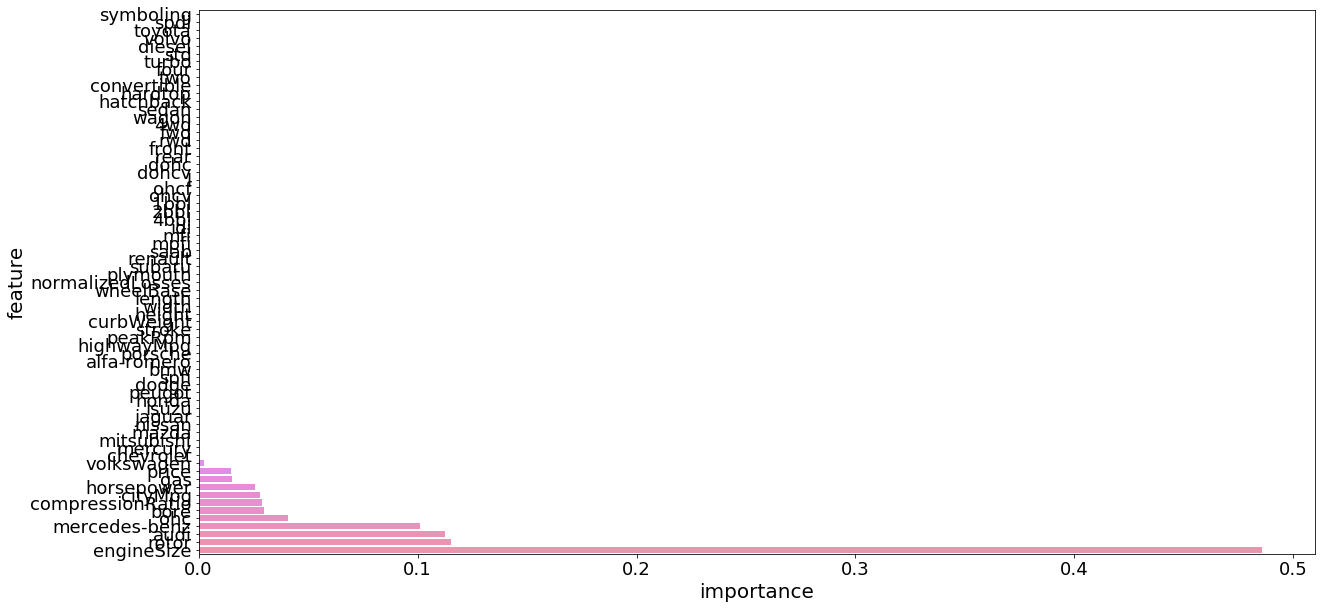

In [14]:
printFeatureImportance(dt_classifier)

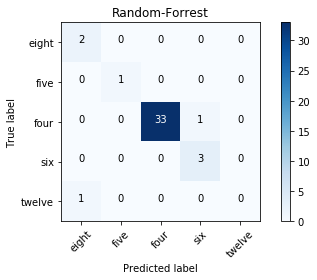

In [15]:
DT_CM = plot_confusion_matrix(cnf_matrix, classes=labels,
                      title="Random-Forrest")

# Random Forrest

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=500, )
rf_classifier.fit(train_X_prepared, train_y.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
rf_classifier.score(test_X_prepared, test_y)

0.926829268292683

In [18]:
predicted = rf_classifier.predict(test_X_prepared)
actual = test_y
cnf_matrix = confusion_matrix(actual, predicted)

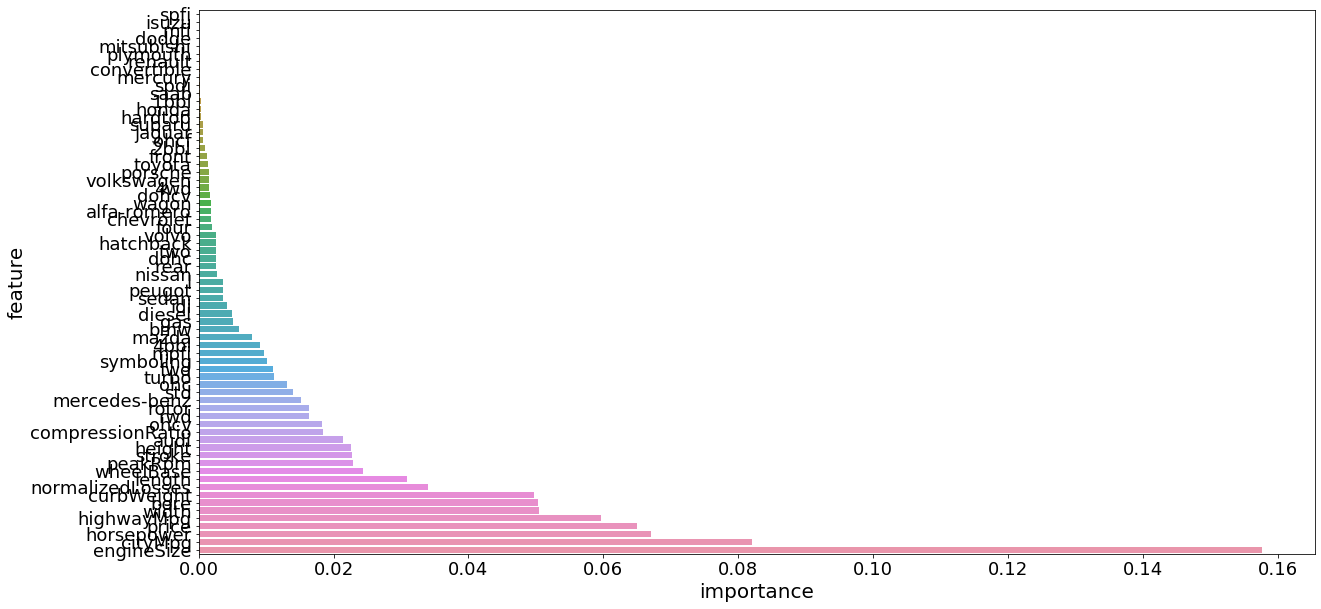

In [19]:
printFeatureImportance(rf_classifier)

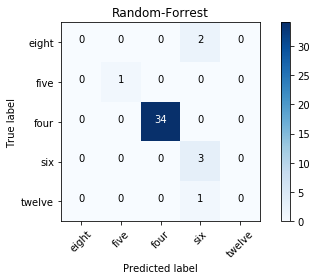

In [20]:
RF_CM = plot_confusion_matrix(cnf_matrix, classes=labels,
                      title="Random-Forrest")

In [21]:
# Adaboost

In [22]:
adab_classifier = AdaBoostClassifier()
adab_classifier.fit(train_X_prepared, train_y.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [31]:
score = adab_classifier.score(test_X_prepared, test_y)
score

0.9024390243902439

In [25]:
predicted = adab_classifier.predict(test_X_prepared)
actual = test_y
cnf_matrix = confusion_matrix(actual, predicted)

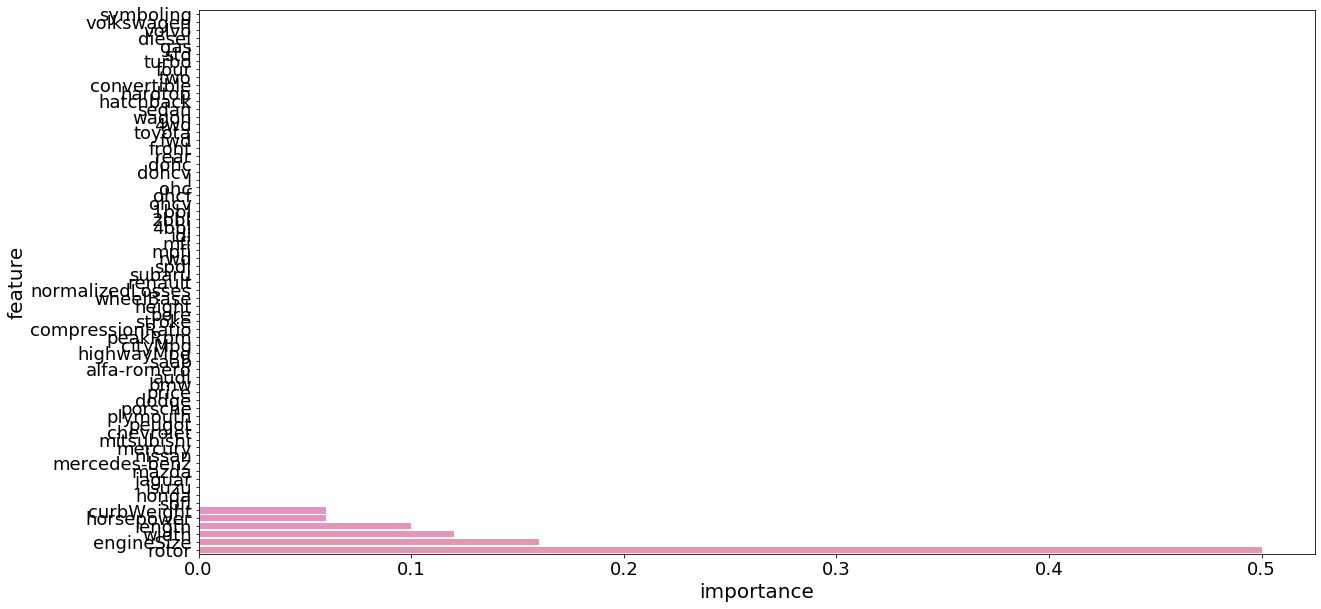

In [27]:
printFeatureImportance(adab_classifier)

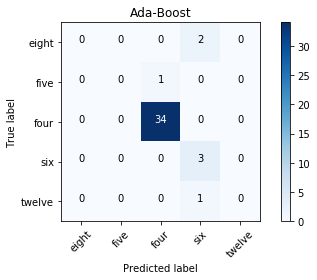

In [28]:
RF_CM = plot_confusion_matrix(cnf_matrix, classes=labels,
                      title="Ada-Boost")

In [ ]:
from sklearn import metrics

# Interpretation
Die gewählten Klassifikationsalgorithmen funktionieren grundsätzlich gut (allesammt >90% Accuracy). Die Beste Accuracy erzielt jedoch der Decsion Tree mit 95% Accuracy. Die Feature-Importance ist wiederum für jeden Algothmus unterschiedlich in der Sequenz. Betrachet man jedoch jeweils die "TopMost-important-Feaure" je Modell so kann man sagen, dass die Feature "engine-Size", "Curbweight|Leergewicht", "HP", "Length / Width" bede